**Лабораторная работа**

**Описание задания**

Лабораторная работа выполняется Вами в течение семестра. Для удобства задание разбито на несколько логических частей, соответствующих изучаемым в рамках курса темам. Не стоит откладывать выполнение этого задания на самый конец курса.

Каждая из частей лабораторной работы подразумевает проведение исследования, экспериментов или подведение выводов по ним на основе датасета: https://drive.google.com/file/d/1fABzTyH2tlMYjJyDOAnwkH0HkWAG27_L/view?usp=sharing

**Легенда**

Вы - успешный специалист в области datascience и вас наняла риэлторская компания, размещающая объявления о продаже/аренде домов на популярном сайте для объявлений vatio.org. Вам требуется обучить модель, которая сможет предсказать популярность объявления - исходя из этих предсказаний аналитики риэлторской компании будут редактировать описания объявлений, выставляемых на этой платформе.

**Из чего состоит задание?**
Всего в лабораторной работе 5 частей:

* **EDA**- необходимо исследовать данные в предлагаемом Вам датасете. К исследованию данных относится анализ распределения значений в признаках, проверка скоррелированности признаков и т.д.
* **Feature engineering** - необходимо заполнить пропуски в данных, обработать категориальные признаки и т.д.
* **Выбор целевой метрики** - необходимо выбрать метрику качества, которую вы будете оптимизировать. Для выбранной метрики необходимо написать пояснение. В этом задании нет единственного правильного ответа, однако за откровенно неадекватный выбор или слабую аргументацию будут снижаться баллы.
* **Проведение экспериментов** - необходимо попробовать разные модели, изученные в рамках курса и оптимизировать ими выбранную вами целевую метрику. Решение, состоящее только из grid-search по гиперпараметрам Catboost, получает 0 баллов.
* **Анализ ошибок модели** - необходимо взять несколько примеров из тестовой части датасета, на которых модель дала неправильный ответ, и попытаться проанализировать их, найти закономерности, полученные выводы проверить на других примерах.

**Требования к заданиям**

**Сдача задания**

Лабораторная работа должна быть оформлена в виде Jupyter-ноутбука. Допускается сдача ноутбука в виде ссылки на Google Colab, но в этом случае проверьте наличие доступа. В случае, если ноутбук по ссылке недоступен или удален, работа получает 0 баллов. Вместе с Jupyter-ноутбуком приложите pdf-файл, полученный из ноутбука. (https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html)

**Оформление задания**

Выводы по каждому блоку должны быть оформлены при помощи Markdown-ячеек либо содержать понятные (интерпретируемые) графики. Оси на графиках должны быть подписаны либо ячейка, предшествующая графику, должна содержать пояснение. Решения, содержащие графики без подписей/пояснений, output'ы ячеек с кодом более чем на 50% экрана и прочие непотребства, не будут оценены на максимальный балл. Также перед сдачей необходимо очистить output'ы ячеек с логами обучения, также очистить выходные данные ячеек, выполняющих чтение/загрузку файлов и подобное.

**Использование иного контента**

Мемы при оформлении работы использовать можно, но в меру. Несодержательная работа, состоящая только из мемов, получает 0 баллов.

**Оценка лабораторной работы**

Оценка за каждый блок лабораторной работы выставляется независимо. Каждый блок оценивается от 0 до 5 баллов. Выполнение лабораторной работы является необходимым (но не достаточным) условием прохождения курса, т.к. в сущности подводит итог по всему изученному материалу.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.express as px
import seaborn as sns

In [2]:
!gdown 1fABzTyH2tlMYjJyDOAnwkH0HkWAG27_L -O data.csv

Downloading...
From: https://drive.google.com/uc?id=1fABzTyH2tlMYjJyDOAnwkH0HkWAG27_L
To: /content/data.csv
100% 44.4M/44.4M [00:00<00:00, 104MB/s]


# **Этап 1: EDA**

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


Проведем первый взгляд на нашу таблицу с популярностью объявлений в домах, как видим присутсвуют 16 столбцов:
1.   Id 
2.   Количество ванных комнат
3. Количество спален	
4. Идентификатор здания	
5. Дата и время создания объявления	
6. Описание	
7. Адрес здания
8. Характеристики	
9. Широта	
10. Listing id
11. Долгота 
12. Идентификатор менеджера	
13. Фотографии 
14. Цена	
15. Адрес улицы	
16. Таргет

Видим, что из 16 столбцов 7 являются числовыми, остальные содержат текст и др.

Посмотрим сколько пропусков в датасете.

In [5]:
print('Столбцы с наличием пропусков:')
df.isna().sum()[df.isna().sum() > 0]

Столбцы с наличием пропусков:


description        1037
display_address      88
street_address        4
dtype: int64

Видим, что присутсвует всего 3 столбца с пропусками, поскольку description представляет собой большое описание объявления, мы впоследствии удалим этот столбец из-за сложности работы с ним, адрес здания коррелирует с частотой и долготой, как и адрес улицы, что мы прооверим в последствии, поэтому предположительно все 3 столбца будут удалены.  

Первоначально рассмотрим как распределен target.

In [6]:
df['TARGET'].value_counts()/len(df)*100

low       69.469693
medium    22.752272
high       7.778035
Name: TARGET, dtype: float64

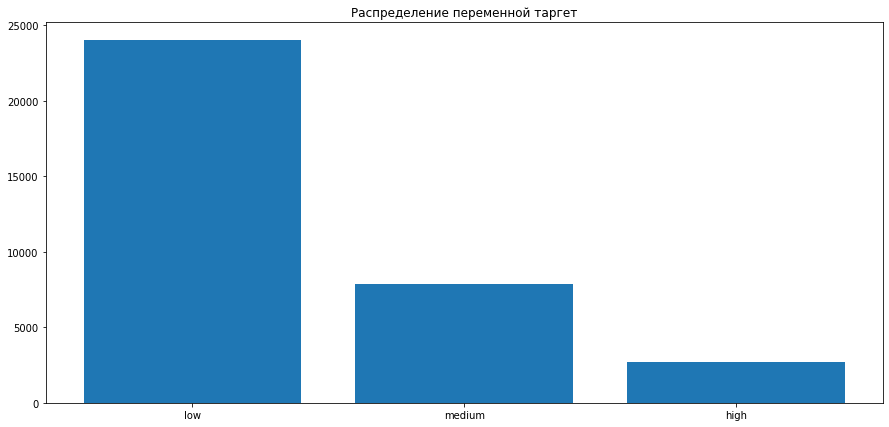

In [7]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x = df['TARGET'].value_counts().index, height = df['TARGET'].value_counts())
ax.set_title('Распределение переменной таргет')
plt.show()

Видим, что в таргете большую часть занимают слабо просматриваемые объявления(69,5%), high всего (8%) от всего количества данных.

Посмотрим на корелляцию между признаками, с помощью heatmap. 

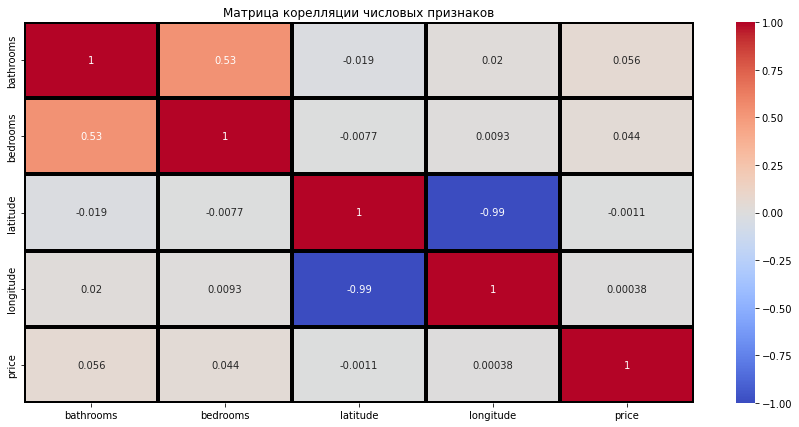

In [8]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.drop(columns = ['Id', 'listing_id']).corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', fmt='.2g').set_title('Матрица корелляции числовых признаков')
plt.show()

Видим, что присутствует корелляция между количеством спальн и ванных комнат, а также незначительная, но при этом сравнительно больше остальных, корелляция между ценой и количеством спальн и ванных комнат

Далее рассмотрим какое распределение имеет столбец с ценой.

In [9]:
df['price'].sort_values(ascending=False)[:10]

1047     4490000
24879    1150000
7052     1070000
13105    1070000
27815     100000
24422      90000
2516       58020
21021      53100
3200       50614
15278      50550
Name: price, dtype: int64

Видим, что у нас присутсвуют достаточно сильные выбросы, т.к. 3 объявления имеют цену больше 1 млн, остальные же ниже 100 тыс.

Удалим выбросы и построим наглядный график.

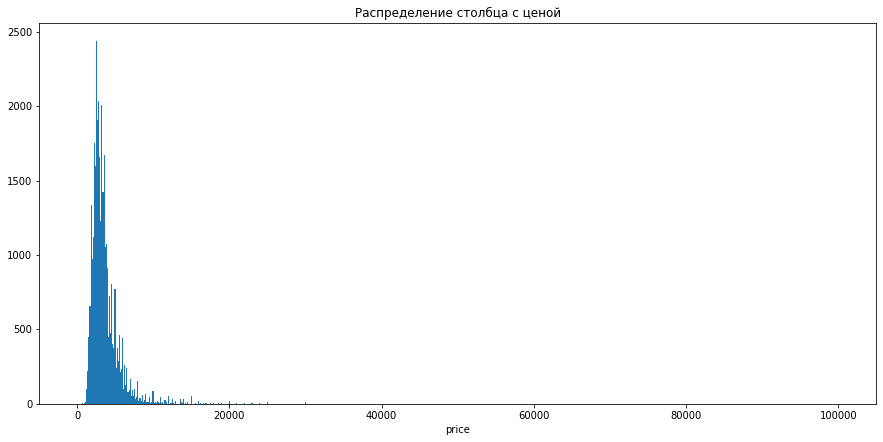

In [63]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(df['price'].sort_values(ascending=False)[4:], bins = 700)
ax.set_title('Распределение столбца с ценой')
ax.set_xlabel('price')
fig.show()

Видим, что в любом случве у нашего распределения цены тяжелые хвосты, и большинство объявлений будут иметь цену меньше 7 тыс.

Рассмотрим насколько уникальные значение содержатся в некоторых столбцах.

In [11]:
print('Кол-во строк в датафрейме:', len(df))
print('Кол-во уникальных Id:', len(df['Id'].value_counts()))                   # Все уникальны
print('Кол-во уникальных building_id:', len(df['building_id'].value_counts())) #Присутсвует 5713 нулевых значений, дальше встречается меньше 200 объявлений из одного дома
print('Кол-во уникальных description:', len(df['description'].value_counts())) #Много пустых описаний, либо website_redacted и т.д. , но почти все значения уникальны
print('Кол-во уникальных display_address:', len(df['display_address'].value_counts())) 
print('Кол-во уникальных features:', len(df['features'].value_counts())) 
print('Кол-во уникальных manager_id:', len(df['manager_id'].value_counts()))   #У одного менеджера 1820 объявлений, далее 513 и меньше 300 после у всех 
print('Кол-во уникальных street_address:', len(df['street_address'].value_counts()))

Кол-во строк в датафрейме: 34546
Кол-во уникальных Id: 34546
Кол-во уникальных building_id: 6378
Кол-во уникальных description: 27757
Кол-во уникальных display_address: 6998
Кол-во уникальных features: 8245
Кол-во уникальных manager_id: 3134
Кол-во уникальных street_address: 12398


Рассмотрим как представлены широта и долгота в данных

In [12]:
df_latitude = df.groupby(['street_address']).agg({'latitude': ['min', 'max'], 'longitude':['min', 'max']})['latitude']
df_latitude['difference'] =  df_latitude['max'] - df_latitude['min'] 
df_latitude['difference'].value_counts()

0.0000    11935
0.0001       87
0.0001       66
0.0002       23
0.0003       13
          ...  
0.0502        1
0.0050        1
0.0025        1
0.0169        1
0.0187        1
Name: difference, Length: 131, dtype: int64

In [13]:
df_longitude = df.groupby(['street_address']).agg({'latitude': ['min', 'max'], 'longitude':['min', 'max']})['longitude']
df_longitude['difference'] =  df_longitude['max'] - df_longitude['min'] 
df_longitude['difference'].value_counts()

0.0000    11916
0.0001      118
0.0001       28
0.0002       19
0.0002       17
          ...  
0.0035        1
0.0070        1
0.0220        1
0.0024        1
0.0110        1
Name: difference, Length: 141, dtype: int64

In [14]:
df[df['longitude'] == 0].index 

Int64Index([308, 7234, 10426, 20352, 24090, 27868, 28855, 33373], dtype='int64')

In [15]:
df[df['latitude'] == 0].index

Int64Index([308, 7234, 10426, 20352, 24090, 27868, 28855, 33373], dtype='int64')

Как можно понять изучая карты, даже максимальное значение разница в широте и долготе по улице укладывается в рамки нормального, что говорит о том, что широта и долго в данных указаны корректно (за исключением 8 строк, где широта и долгота нулевые, их заменим на средние значения) и четко описывают положение домов. значит столбцы с названиями адресов домов и названиями адресов улиц можно убрать. Рассмотрим широту и долготу на графике.

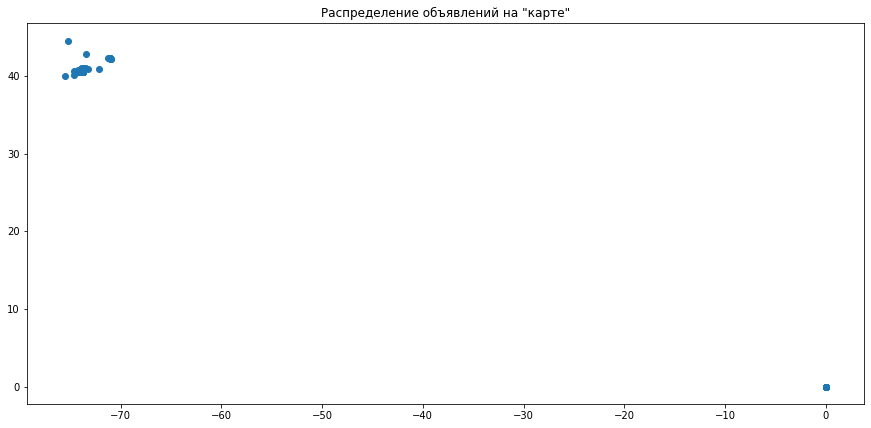

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(x = df['longitude'], y = df['latitude'])
ax.set_title('Распределение объявлений на "карте"')
plt.show()

In [17]:
def num_of_features(a):
  counter = 0
  for j in eval(a):
    counter += 1
  return counter

df['num_of_features'] = df['features'].apply(num_of_features)

In [18]:
num_of_features = df['num_of_features']
df = df.drop(columns = ['num_of_features'])

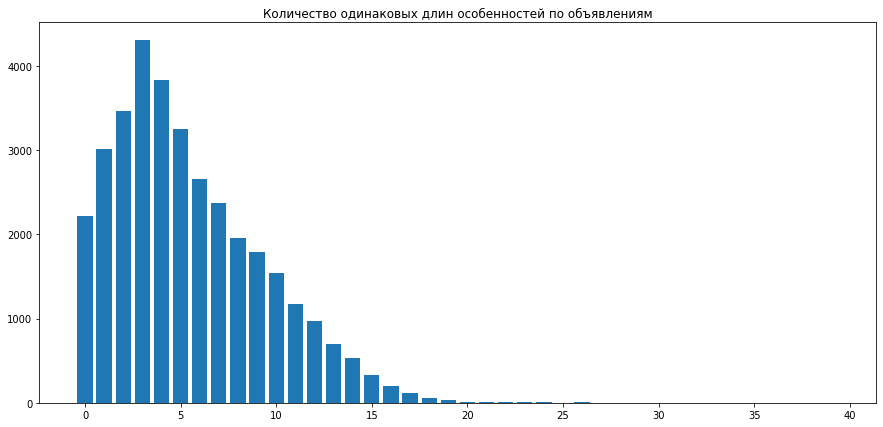

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x = num_of_features.value_counts().index , height = num_of_features.value_counts().values)
ax.set_title('Количество одинаковых длин особенностей по объявлениям')
plt.show()

Видим, что  объяаления содержат от 0 до 39 фичей, но объявления в которых больше 15 фичей встречаются достаточно редко

Рассмотрим также количество фото в обьявлениях

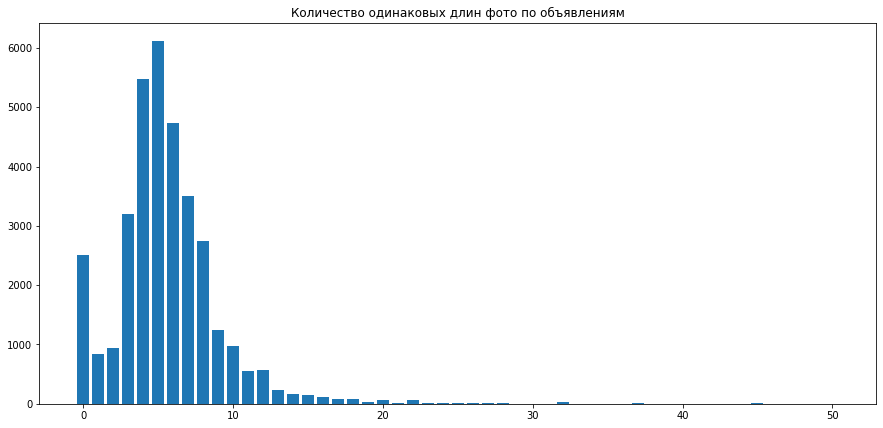

In [20]:
def num_of_features(a):
  counter = 0
  for j in eval(a):
    counter += 1
  return counter
  
df['num_of_photos'] = df['photos'].apply(num_of_features)

num_of_photos = df['num_of_photos']
df = df.drop(columns = ['num_of_photos'])

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x = num_of_photos.value_counts().index , height = num_of_photos.value_counts().values)
ax.set_title('Количество одинаковых длин фото по объявлениям')
plt.show()

Видим, что объявления содержат от 0, до 50 фотографий.

Рассмотрим количество объявлений, в которых отсутствует building_id

In [21]:
print('Длина всего датафрейма:', len(df))
print('Количество нулей в столбце building_id:', len(df[df['building_id'] == '0']))
print('Количество нулей в столбце building_id в %: ', round(len(df[df['building_id'] == '0'])/len(df)*100,2), '%')

Длина всего датафрейма: 34546
Количество нулей в столбце building_id: 5713
Количество нулей в столбце building_id в %:  16.54 %


Видим, что в 16.54% объявлений отсутствует building_id.

Далее рассмотрим значения в столбце с спальнями и ванными

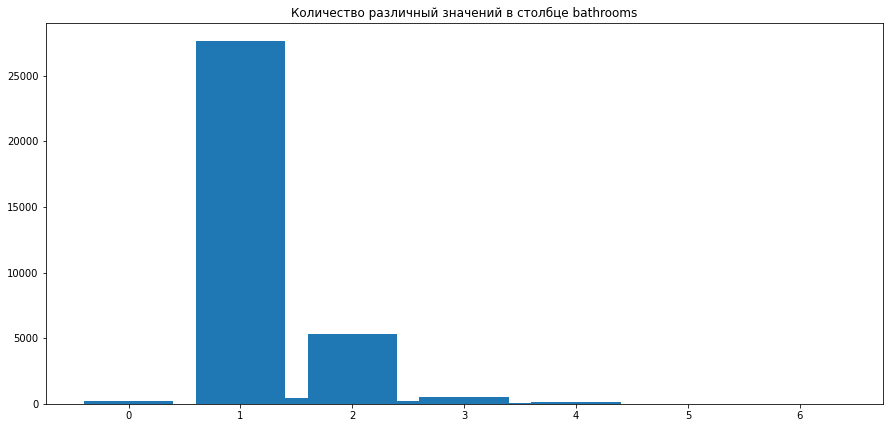

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x = df['bathrooms'].value_counts().index, height = df['bathrooms'].value_counts())
ax.set_title('Количество различный значений в столбце bathrooms')
plt.show()

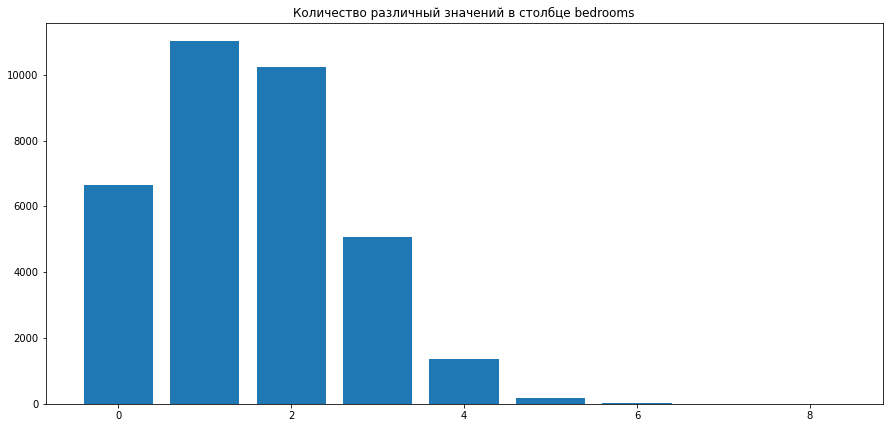

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x = df['bedrooms'].value_counts().index, height = df['bedrooms'].value_counts())
ax.set_title('Количество различный значений в столбце bedrooms')
plt.show()

# **Этап 2: Feature engineering**

Для начала разобьем выборку на train/test, при этом нам нужно чтобы данные были разбиты равномерно. 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['TARGET']), df['TARGET'], 
                                                    train_size=0.85, 
                                                    random_state=42,
                                                    stratify=df['TARGET'])

Начнем Feature engineering с того, что удалим ненужные столбцы из исходного датафрейма, это столбцы 'Id', 'display_address', 'manager_id', 'street_address','listing_id', 'building_id'.

Id не дает нам никакой информации, как и manager_id, listing_id, building_id, т.к. они полностью заполнены и если их преобразовывать через OHE, будет слишком много фичей.

'display_address' и 'street_address' будут описаны через широту и долготу.

Начнем преобразование со столбца TARGET, преобразуем его в формат, где low - это 0 класс, medium - 1, high - 2. 

Преобразуем нулевую широту и долготу в столбцах в среднее значение по столбцу на train данных.

Добавим столбец, который будет содержать количество фичей, которое содержит каждое объявление.

Также сделаем такое же преобразование со столбцом фотографий

Далее добавим столбец, который будет содержать количество знаков в объявлении.Так как в описании есть 1037 NaN значений, то их нужно обработать как 0 символов.

Далее поработаем с датой, идея состоит в том, что будем хранить время в часах, которое висит объявление, за минимальное время возьмем минимальное время из столбца.

После деления на np.timedelta64(1,'D'), получим в целой части количество дней, а в дробной части, часть прошедшего дня, так например:

47 days 19:10:27 это 47.798924, потому что 19:10:27 это 23009 секунд, весь день это 28800 секунд.
23009/28800 = 0.798924

Остается последний пункт, выделим 100 самых частовстречающихся фичей и сделаем самостоятельный OHE по ним.

Всего оригинальных фичей получится 1052 во всем датафрейме, получается, что мы оставляем примерно 10,5%, однако они самые частовстречающиеся, если же в объявлении встречались редкие фичи, то они пусть и не сильно влиятельно, но будут учтены в столбце с количеством фичей.

Осталось сделать итоговый датафрейм, из которого удалим данные до предобработки, отнормируем признаки и объединим с OHE датафреймом.

In [26]:
class Transform:

  def __init__(self):
    
    self.mean_latitude = None
    self.mean_longitude = None
    #self.normalizer = None
    self.features_dict_top_keys = None
    self.features_dict_top = None
    self.mu = None
    self.std = None

  def num_of_features(self, a):
    counter = 0
    for j in eval(a):
      counter += 1
    return counter

  def description_length(self, a):
    if pd.isna(a):         
      return 0
    return len(a)

  def fit_transform_X(self, X_train):
    df_feature_eng = X_train.copy()
    df_feature_eng = df_feature_eng.reset_index(drop = True)
    df_feature_eng = df_feature_eng.drop(columns = ['Id', 'display_address', 'manager_id', 'street_address', 'listing_id', 'building_id'])

    self.mean_latitude = df_feature_eng[df_feature_eng['latitude'] != 0]['latitude'].mean()
    self.mean_longitude = df_feature_eng[df_feature_eng['longitude'] != 0]['longitude'].mean()

    df_feature_eng.loc[df_feature_eng['longitude'] == 0, ['longitude']] = self.mean_longitude
    df_feature_eng.loc[df_feature_eng['latitude'] == 0, ['latitude']] = self.mean_latitude

    df_feature_eng['num_of_features'] = df_feature_eng['features'].apply(self.num_of_features)
    df_feature_eng['num_of_photos'] = df_feature_eng['photos'].apply(self.num_of_features)
    df_feature_eng['descr_len'] = df_feature_eng['description'].apply(self.description_length)
    df_feature_eng['datetime_created'] = pd.to_datetime(df_feature_eng['created'])
    df_feature_eng['datetime_created'] = (df_feature_eng['datetime_created'] - min(df_feature_eng['datetime_created'])) / np.timedelta64(1,'D')

    features_dict = {}
    for feat_list in df_feature_eng['features']:
      for feature in eval(feat_list):
        if feature.upper() not in features_dict:
          features_dict[feature.upper()] = 0
        features_dict[feature.upper()] += 1

    sorted_tuple_features = sorted(features_dict.items(), key = lambda x: x[1], reverse = True)
    features_dict_top = dict(sorted_tuple_features[:100])

    self.features_dict_top = features_dict_top
    self.features_dict_top_keys = features_dict_top.keys()

    OHE_df = pd.DataFrame(np.zeros((len(X_train), len(self.features_dict_top))), columns = self.features_dict_top_keys)

    for i in range(len(OHE_df)):
      for feature in eval(df_feature_eng.loc[i]["features"]):
        if feature.upper() in self.features_dict_top_keys:
          OHE_df.loc[i][feature.upper()] = 1

    final_df = df_feature_eng.copy()
    final_df = final_df.drop(columns = ['created', 'description', 'features', 'photos'])

    self.mu = final_df.mean()
    self.std = final_df.std()

    final_df = (final_df - self.mu) / self.std
    
    #self.normalizer = Normalizer().fit(final_df.iloc[:,:].to_numpy())   
    #final_df.iloc[:,:] = self.normalizer.transform(final_df.iloc[:,:].to_numpy())

    finan_df_norm = pd.concat([final_df, OHE_df], axis=1)

    return finan_df_norm

  def transform_X(self, X_test):
    df_feature_eng = X_test.copy()
    df_feature_eng = df_feature_eng.reset_index(drop = True)
    df_feature_eng = df_feature_eng.drop(columns = ['Id', 'display_address', 'manager_id', 'street_address', 'listing_id', 'building_id'])

    df_feature_eng.loc[df_feature_eng['longitude'] == 0, ['longitude']] = self.mean_longitude
    df_feature_eng.loc[df_feature_eng['latitude'] == 0, ['latitude']] = self.mean_latitude

    df_feature_eng['num_of_features'] = df_feature_eng['features'].apply(self.num_of_features)
    df_feature_eng['num_of_photos'] = df_feature_eng['photos'].apply(self.num_of_features)
    df_feature_eng['descr_len'] = df_feature_eng['description'].apply(self.description_length)
    df_feature_eng['datetime_created'] = pd.to_datetime(df_feature_eng['created'])
    df_feature_eng['datetime_created'] = (df_feature_eng['datetime_created'] - min(df_feature_eng['datetime_created'])) / np.timedelta64(1,'D')

    OHE_df = pd.DataFrame(np.zeros((len(X_test), len(self.features_dict_top))), columns = self.features_dict_top_keys)

    for i in range(len(OHE_df)):
      for feature in eval(df_feature_eng.loc[i]["features"]):
        if feature.upper() in self.features_dict_top_keys:
          OHE_df.loc[i][feature.upper()] = 1

    final_df = df_feature_eng.copy()
    final_df = final_df.drop(columns = ['created', 'description', 'features', 'photos'])

    final_df = (final_df - self.mu) / self.std

    #final_df.iloc[:,:] = self.normalizer.transform(final_df.iloc[:,:].to_numpy())

    finan_df_norm = pd.concat([final_df, OHE_df], axis=1)

    return finan_df_norm


  def transform_y(self, y):
    return y.map({"low": 0, "medium": 1, "high": 2})

    

In [27]:
transform = Transform()
X_train = transform.fit_transform_X(X_train)
X_test = transform.transform_X(X_test)
y_train, y_test =  transform.transform_y(y_train), transform.transform_y(y_test)

In [28]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [20399  6681  2284]
Количество строк в y_test по классам: [3600 1179  403]


На этом раздел feature engineering закончен, мы преобразовали данные и отнормировали их.

# **Этап 3: Выбор целевой метрики**

Accuracy как метка нас не удовлетворяет, так как у нас есть дисбаланс в классах. Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок, но поскольку у нас нет ТЗ, и мы не можем сделать вывод в пользу чего конкретно нам склоняться больше. 

То для нас оптимальной будет нечто среднее между ними, то есть **F- мера weighted**, которая отличается тем, что рассчитывает метрики для каждой метки и находит их среднее значения, взвешенные по поддержке (количество истинных экземпляров для каждой метки). Это изменяет макрос для учета дисбаланса меток; Это может привести к F-оценке, которая не находится между точностью и полнотой.


# **Этап 4: Проведение экспериментов**

Заимпортим библиотеку optuna для подбора гиперпараметров.

In [ ]:
!pip install optuna

**Код функции для вывода результата**

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import optuna

def results(model, X_train, X_test, y_train, y_test, cf_matrix_plot = 'Yes'):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = f1_score(y_test, y_pred, average='weighted')
  print(f'Result score: {score}')
  if cf_matrix_plot == 'Yes':
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(3,3)

    fig, ax = plt.subplots(figsize = (15, 7))

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Target Category')
    ax.set_ylabel('Actual Target Category ');

    ax.xaxis.set_ticklabels(['First','Second', 'Third'])
    ax.yaxis.set_ticklabels(['First','Second', 'Third'])

    plt.show()

**Dummy Classification**

Result score: 0.5695661303633155


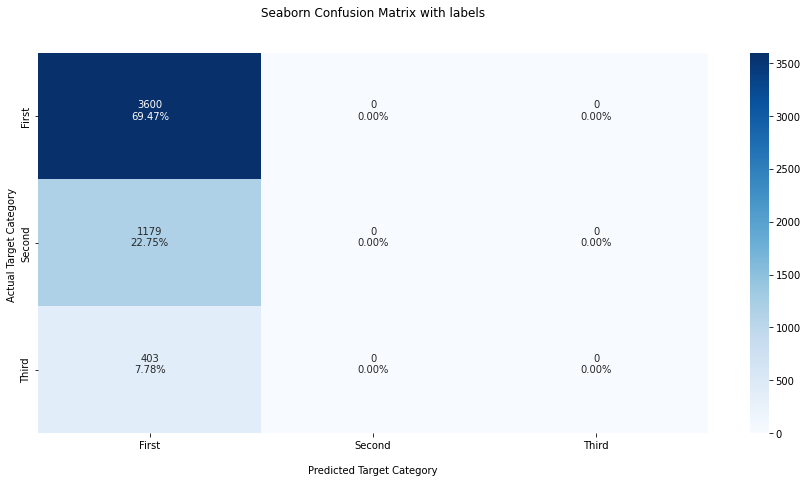

In [ ]:
from sklearn.dummy import DummyClassifier

results(DummyClassifier(random_state = 42), X_train, X_test, y_train, y_test)

**LogisticRegression**

Result score: 0.627823430774449


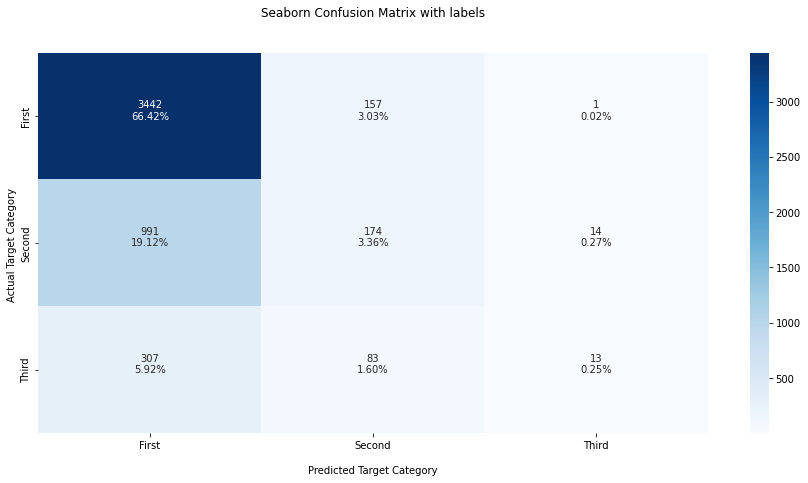

In [ ]:
from sklearn.linear_model import LogisticRegression

results(LogisticRegression(random_state = 42, max_iter = 1000), X_train, X_test, y_train, y_test)


**Проведем подбор параметров для LogisticRegression**

In [ ]:
def objective_LogisticRegression(trial):
    model = LogisticRegression(
        solver = trial.suggest_categorical("solver", ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']),
        tol = trial.suggest_float("tol", 1e-8, 1e-1, log=True),
        C = trial.suggest_float("C", 1e-3, 5, log=True),
        intercept_scaling = trial.suggest_float("intercept_scaling", 1e-3, 5, log=True),
        max_iter = trial.suggest_int("max_iter", 100, 5000),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

study = optuna.create_study(study_name="LogisticRegression", direction="maximize")
study.optimize(objective_LogisticRegression, n_trials=50)

Были подобраны оптимальные параметры и построена модель с ними:

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

Number of finished trials:  50
Best trial:
  Value:  0.6318230670872387
  Params: 
    solver: newton-cg
    tol: 0.08348056002326781
    C: 4.467260318308931
    intercept_scaling: 1.2983338643381135
    max_iter: 1849


Result score: 0.6318230670872387


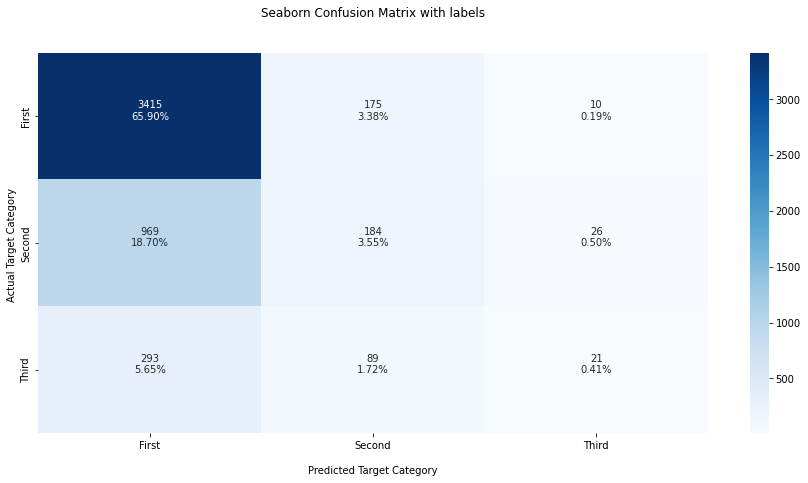

In [ ]:
results(LogisticRegression(**trial.params), X_train, X_test, y_train, y_test)

**LinearSVC**

Result score: 0.6204052437172544


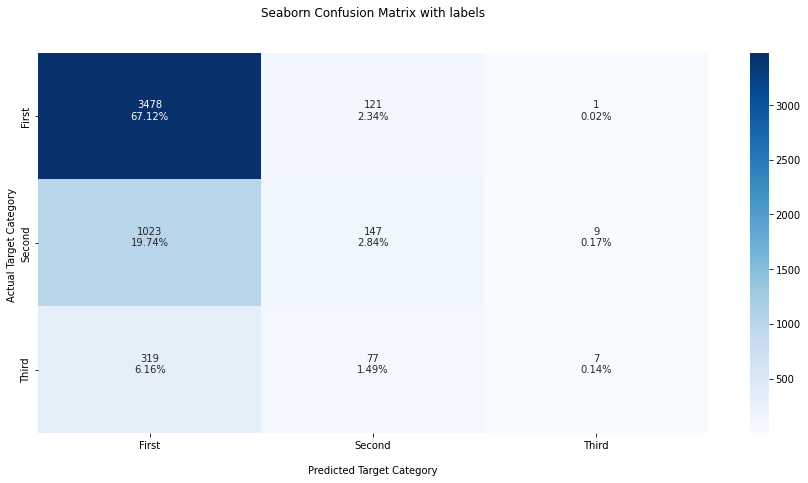

In [ ]:
from sklearn.svm import LinearSVC

results(LinearSVC(random_state = 42), X_train, X_test, y_train, y_test)

Подбор оптимальных параметров Linear_SVC для случая где penalty l1

In [ ]:
def objective_LinearSVC_1(trial):
    model = LinearSVC(       
        penalty = trial.suggest_categorical("penalty", ['l1']),
        loss = trial.suggest_categorical("loss", ['squared_hinge']),
        dual=False,
        tol = trial.suggest_float("tol", 1e-8, 1e-1, log=True),
        C = trial.suggest_float("C", 1e-3, 5, log=True),
        multi_class = trial.suggest_categorical("multi_class", ['ovr', 'crammer_singer']),
        intercept_scaling = trial.suggest_float("intercept_scaling", 1e-3, 5, log=True),
        max_iter = trial.suggest_int("max_iter", 1000, 10000),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

study_LinearSVC_1 = optuna.create_study(study_name="LinearSVC_1", direction="maximize")
study_LinearSVC_1.optimize(objective_LinearSVC_1, n_trials=50)

Оптимальные параметры

In [ ]:
print("Number of finished trials: ", len(study_LinearSVC_1.trials))
print("Best trial:")
trial_LinearSVC_1 = study_LinearSVC_1.best_trial
print("  Value: ", trial_LinearSVC_1.value)
print("  Params: ")
for key, value in trial_LinearSVC_1.params.items():
  print("    {}: {}".format(key, value))

Number of finished trials:  50
Best trial:
  Value:  0.6210782834041355
  Params: 
    penalty: l1
    loss: squared_hinge
    tol: 0.0011705103444605743
    C: 2.4910356469669215
    multi_class: ovr
    intercept_scaling: 0.09949695021735712
    max_iter: 6468


Далее подбор параметров для penalty l2, которые покажет результаты лучше, чем l1

In [ ]:
def objective_LinearSVC_2(trial):
    model = LinearSVC(       
        penalty = trial.suggest_categorical("penalty", ['l2']),
        loss = trial.suggest_categorical("loss", ['hinge', 'squared_hinge']),
        tol = trial.suggest_float("tol", 1e-8, 1e-1, log=True),
        C = trial.suggest_float("C", 1e-3, 5, log=True),
        multi_class = trial.suggest_categorical("multi_class", ['ovr', 'crammer_singer']),
        intercept_scaling = trial.suggest_float("intercept_scaling", 1e-3, 5, log=True),
        max_iter = trial.suggest_int("max_iter", 1000, 10000),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

study_LinearSVC_2 = optuna.create_study(study_name="LinearSVC_2", direction="maximize")
study_LinearSVC_2.optimize(objective_LinearSVC_2, n_trials=50)

Оптимальные параметры для Linear_SVC и модель с ними

In [ ]:
print("Number of finished trials: ", len(study_LinearSVC_2.trials))
print("Best trial:")
trial_LinearSVC_2 = study_LinearSVC_2.best_trial
print("  Value: ", trial_LinearSVC_2.value)
print("  Params: ")
for key, value in trial_LinearSVC_2.params.items():
  print("    {}: {}".format(key, value))

Number of finished trials:  50
Best trial:
  Value:  0.62158447681967
  Params: 
    penalty: l2
    loss: squared_hinge
    tol: 0.00829062698074782
    C: 1.3258374417219945
    multi_class: ovr
    intercept_scaling: 2.9530103891944632
    max_iter: 8023


Result score: 0.62158447681967


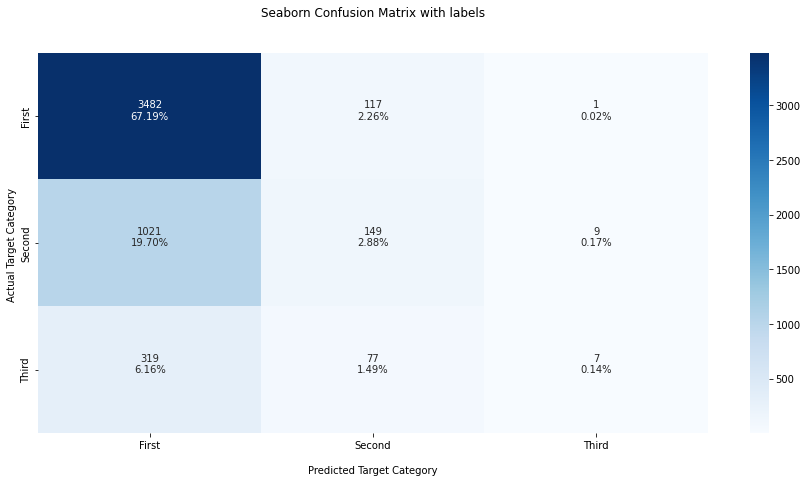

In [ ]:
results(LinearSVC(**trial_LinearSVC_2.params), X_train, X_test, y_train, y_test)

**DecisionTreeClassifier**

Result score: 0.655548508315167


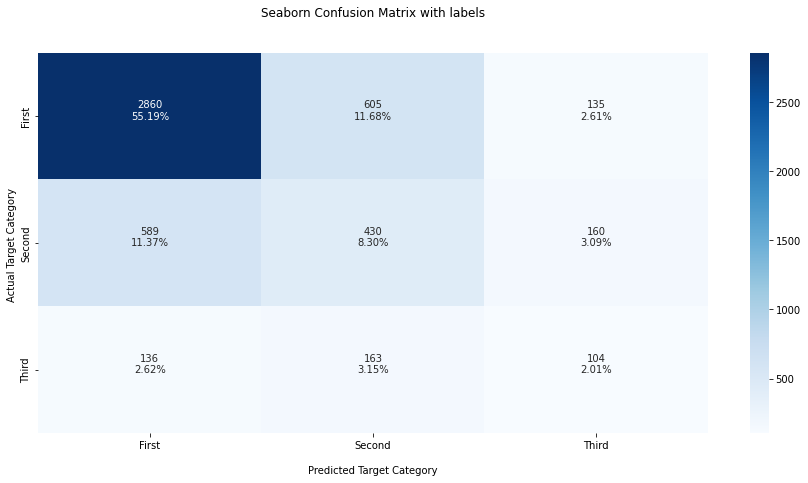

In [ ]:
from sklearn.tree import DecisionTreeClassifier

results(DecisionTreeClassifier(random_state = 42), X_train, X_test, y_train, y_test)

Подбор параметров для DecisionTreeClassifier

In [ ]:
def objective_DecisionTreeClassifier(trial):
    model = DecisionTreeClassifier(
        criterion = trial.suggest_categorical("criterion", ['gini', 'entropy']),
        splitter = trial.suggest_categorical("splitter", ['best', 'random']),
        max_depth = trial.suggest_int("max_depth", 1, 100000),
        min_samples_split = trial.suggest_int("min_samples_split", 2, 1000),
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 1000),
        min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 1e-4, 0.5, log=True),
        max_features = trial.suggest_categorical("max_features", ['auto', 'sqrt', 'log2', None]),
        max_leaf_nodes =  trial.suggest_int("max_leaf_nodes", 1, 10000),
        min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 1e-4, 5, log=True),
        ccp_alpha = trial.suggest_float("ccp_alpha", 1e-4, 5, log=True),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

study_DecisionTreeClassifier = optuna.create_study(study_name="DecisionTreeClassifier", direction="maximize")
study_DecisionTreeClassifier.optimize(objective_DecisionTreeClassifier, n_trials=10000)

Optuna также показывает нам приоритетность гиперпараметров, что представлено ниже

In [ ]:
optuna.visualization.plot_param_importances(study_DecisionTreeClassifier)

Оптимальные параметры для DecisionTreeClassifier и модель с ними

In [ ]:
print("Number of finished trials: ", len(study_DecisionTreeClassifier.trials))
print("Best trial:")
trial_DecisionTreeClassifier = study_DecisionTreeClassifier.best_trial
print("  Value: ", trial_DecisionTreeClassifier.value)
print("  Params: ")
for key, value in trial_DecisionTreeClassifier.params.items():
  print("    {}: {}".format(key, value))

Number of finished trials:  5192
Best trial:
  Value:  0.6767731805001548
  Params: 
    criterion: entropy
    splitter: best
    max_depth: 79208
    min_samples_split: 358
    min_samples_leaf: 53
    min_weight_fraction_leaf: 0.0002841651598423179
    max_features: None
    max_leaf_nodes: 7557
    min_impurity_decrease: 0.00012436862032269696
    ccp_alpha: 0.00035390484466121726


Result score: 0.6767731805001548


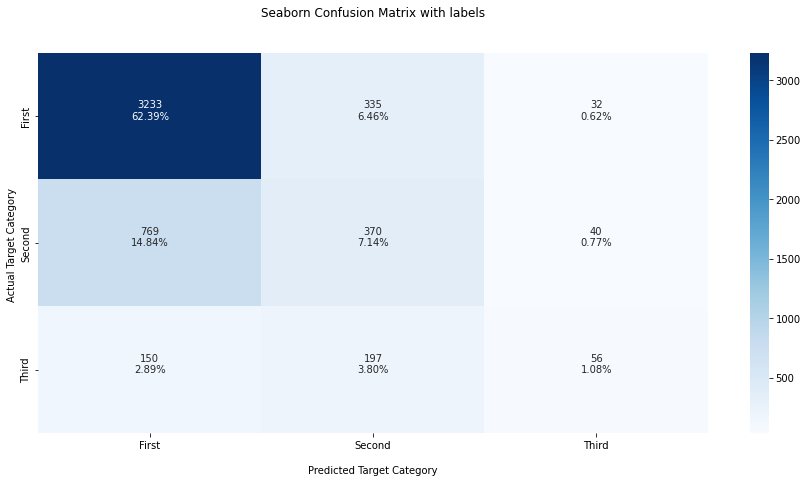

In [ ]:
results(DecisionTreeClassifier(**trial_DecisionTreeClassifier.params), X_train, X_test, y_train, y_test)

**BaggingClassifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

results(BaggingClassifier(LogisticRegression(random_state = 42), random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')
results(BaggingClassifier(LinearSVC(random_state = 42), random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')
results(BaggingClassifier(DecisionTreeClassifier(random_state = 42), random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

Result score: 0.6263717091919188
Result score: 0.6181655818281704
Result score: 0.6869604536898447


Сверху представлена работа бэггинга на стандартных параметрах

Снизу по подобранным гиперпараметрам, как видим, для бэггинга на логистической регрессии, результат стал лучше, для Деревьев наоборот

In [ ]:
results(BaggingClassifier(LogisticRegression(**trial.params), random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')
results(BaggingClassifier(DecisionTreeClassifier(**trial_DecisionTreeClassifier.params), random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

Result score: 0.6300720098771717
Result score: 0.6571454932376507


**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

results(RandomForestClassifier(random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

Result score: 0.678018947443272


**StackingClassifier**

In [ ]:
from sklearn.ensemble import StackingClassifier

results(StackingClassifier([("tree", DecisionTreeClassifier(random_state = 42)), 
                                ("logistic", LogisticRegression(random_state = 42))], 
                               final_estimator = LinearSVC(random_state = 42)), 
        X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

results(StackingClassifier([("tree", DecisionTreeClassifier(random_state = 42)), 
                                ("logistic", LogisticRegression(random_state = 42))], 
                               final_estimator = DecisionTreeClassifier(random_state = 42)), 
        X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

results(StackingClassifier([("tree", DecisionTreeClassifier(random_state = 42)), 
                                ("logistic", LogisticRegression(random_state = 42))], 
                               final_estimator = LogisticRegression(random_state = 42)), 
        X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

Result score: 0.6488796290216656
Result score: 0.6142661594552212
Result score: 0.658100760319315


Аналогично бэггингу были построены модели стекинга с гиперпараметрами по умолчанию и подобранными через optuna? во всех случаях подобранные гипермапарметры улучшили результат

In [ ]:
results(StackingClassifier([("tree", DecisionTreeClassifier(**trial_DecisionTreeClassifier.params)), 
                                ("logistic", LogisticRegression(**trial.params))], 
                               final_estimator = LinearSVC(random_state = 42)), 
        X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

results(StackingClassifier([("tree", DecisionTreeClassifier(**trial_DecisionTreeClassifier.params)), 
                                ("logistic", LogisticRegression(**trial.params))], 
                               final_estimator = DecisionTreeClassifier(**trial_DecisionTreeClassifier.params)), 
        X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

results(StackingClassifier([("tree", DecisionTreeClassifier(**trial_DecisionTreeClassifier.params)), 
                                ("logistic", LogisticRegression(**trial.params))], 
                               final_estimator = LogisticRegression(**trial.params)), 
        X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

Result score: 0.6708761682119446
Result score: 0.6679720337015767
Result score: 0.6781843915637816


**BoostingClassifier**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier

results(HistGradientBoostingClassifier(random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')
results(GradientBoostingClassifier(random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

Result score: 0.7123046694158908
Result score: 0.666805518547794


Поскольку лучше себя показал HistGradientBoostingClassifier, подберем гиперпараметры для него 

In [ ]:
def objective_HistGradientBoostingClassifier(trial):
    model = HistGradientBoostingClassifier(
        learning_rate =  trial.suggest_float("learning_rate", 1e-4, 1, log=True),
        max_iter = trial.suggest_int("max_iter", 1, 2000),
        max_leaf_nodes =  trial.suggest_int("max_leaf_nodes", 1, 10000),
        max_depth = trial.suggest_int("max_depth", 1, 10000),
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 1000),
        l2_regularization = trial.suggest_float("l2_regularization", 0, 4),
        max_bins = trial.suggest_int("max_bins", 1, 255),
        tol = trial.suggest_float("tol", 1e-9, 1e-2, log=True),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

study_HistGradientBoostingClassifier = optuna.create_study(study_name="HistGradientBoostingClassifier", direction="maximize")
study_HistGradientBoostingClassifier.optimize(objective_HistGradientBoostingClassifier, n_trials=100)

Лучшие параметры для HistGradientBoostingClassifier:

Number of finished trials:  100

**Best trial:**

  Value:  0.7185453270599408

  **Params:** 

  learning_rate: 0.017850504943964514

  max_iter: 1908

  max_leaf_nodes: 7345

  max_depth: 5733

  min_samples_leaf: 309

  l2_regularization: 2.162025746431885

  max_bins: 79

  tol: 3.5611931258287427e-07


**AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

results(AdaBoostClassifier(LogisticRegression(random_state = 42), random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')
results(AdaBoostClassifier(DecisionTreeClassifier(random_state = 42), random_state = 42), X_train, X_test, y_train, y_test, cf_matrix_plot = 'No')

Result score: 0.5869841033721473
Result score: 0.6740911534894761


XGBoost

In [ ]:
!pip install xgboost

Result score: 0.6461533895336197


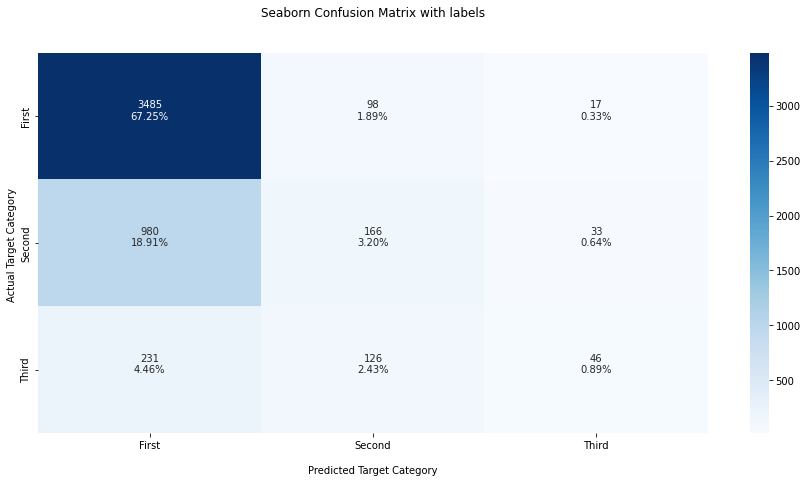

In [35]:
from xgboost import XGBClassifier

results(XGBClassifier(random_state = 42), X_train, X_test, y_train, y_test)

**CatBoost**

In [ ]:
!pip install catboost

Learning rate set to 0.094012
0:	learn: 1.0330866	total: 123ms	remaining: 2m 2s
500:	learn: 0.5169072	total: 22.8s	remaining: 22.7s
999:	learn: 0.4586300	total: 36.4s	remaining: 0us
Result score: 0.7195775813603676


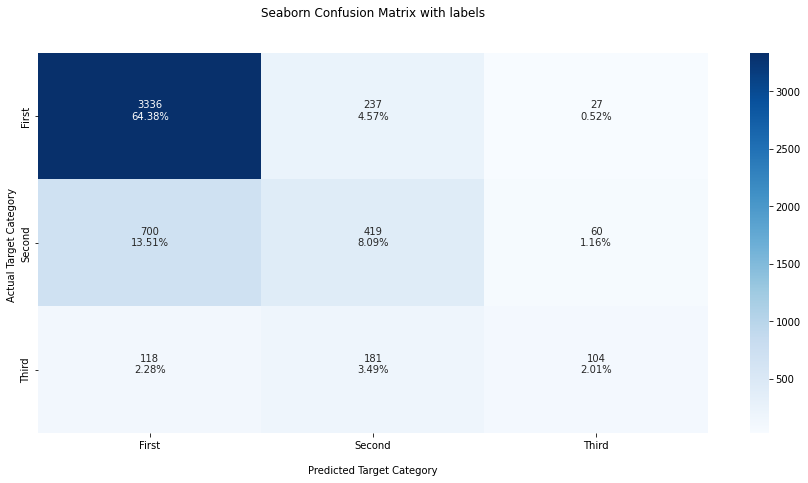

In [37]:
from catboost import CatBoostClassifier

results(CatBoostClassifier(metric_period=500), X_train, X_test, y_train, y_test)

Видим, что Catboost по умолчанию показал лучший результат, подберем для него гиперпараметры ниже

In [ ]:
def objective_CatBoostClassifier(trial):
    model = CatBoostClassifier(        
        iterations =  trial.suggest_int("iterations", 100, 5000),
        learning_rate =  trial.suggest_float("learning_rate", 1e-2, 1, log=True),
        depth = trial.suggest_int("depth", 6, 10),
        verbose=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')

study_catboost = optuna.create_study(study_name="CatBoostClassifier", direction="maximize")
study_catboost.optimize(objective_CatBoostClassifier, n_trials=100)

Для Catboost были подобраны следующие гиперпараметры и построена модель по ним

In [ ]:
print("Number of finished trials: {}".format(len(study_catboost.trials)))
print("Best trial:")
trial_catboost = study_catboost.best_trial
print("  Value: {}".format(trial_catboost.value))
print("  Params: ")
for key, value in trial_catboost.params.items():
  print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.7244873173117328
  Params: 
    iterations: 1118
    learning_rate: 0.09881936390555003
    depth: 6


0:	learn: 1.0299132	total: 34.4ms	remaining: 38.4s
200:	learn: 0.5682340	total: 5.95s	remaining: 27.2s
400:	learn: 0.5281945	total: 11.7s	remaining: 20.9s
600:	learn: 0.4986550	total: 17.5s	remaining: 15s
800:	learn: 0.4746424	total: 23.3s	remaining: 9.21s
1000:	learn: 0.4526313	total: 29.1s	remaining: 3.41s
1117:	learn: 0.4413700	total: 32.6s	remaining: 0us
Result score: 0.7244873173117328


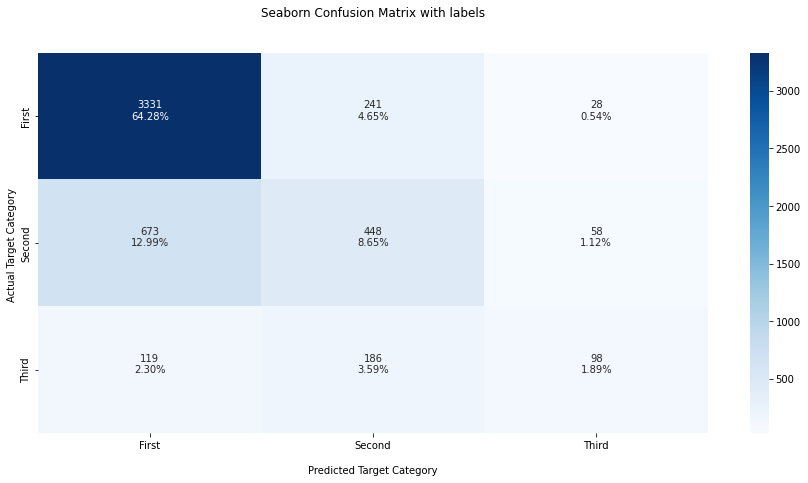

In [ ]:
results(CatBoostClassifier(iterations= 1118, learning_rate = 0.09881936390555003, depth = 6, metric_period=200), X_train, X_test, y_train, y_test)

В заключении можно подвести следующие итоги по результатам экспериментов:

3 лучших модели и их результаты:

1.   **Catboost** - Result score: 0.7244873173117328
2.   **HistGradientBoostingClassifier**  - Result score: 0.7185453270599408
3.   **BaggingClassifier на DecisionTree с параметрами по умолчанию** -  Result score: 0.6869604536898447


# **Этап 5: Анализ ошибок модели**

Поскольку Catboost показал лучшие результаты, то рассмотрим его ошибки и проанализируем возможные зависимости в ошибках. Столбцы с ОНЕ брать не будем, так как по ним проблематично провести нормальный анализ.

In [43]:
сat = CatBoostClassifier(iterations= 1118, learning_rate = 0.09881936390555003, depth = 6, verbose=False)
сat.fit(X_train, y_train)
y_pred = сat.predict(X_test)

Посмотрим важность признаков по нашей модели для дальнейшего анализа.

In [44]:
df_feature_importance = pd.DataFrame(list(zip(X_test.columns.values.tolist(), сat.get_feature_importance())),
               columns =['features', 'Importance'])
df_feature_importance.sort_values(by='Importance', ascending=False).head(10)

,features,Importance
4,price,22.179021
2,latitude,11.102877
1,bedrooms,10.180677
3,longitude,9.919498
7,descr_len,7.024757
8,datetime_created,6.731707
6,num_of_photos,5.985972
5,num_of_features,3.843137
16,NO FEE,3.384154
10,HARDWOOD FLOORS,2.091485


**Видим, что 8 из 9 не OHE признаков (кроме bathrooms) в топе по важности признаков, по ним и будем вести анализ**

In [45]:
df_feature_importance = pd.DataFrame(list(zip(X_test.columns.values.tolist()[:9], сat.get_feature_importance()[:9])),
               columns =['features', 'Importance'])
df_feature_importance.sort_values(by='Importance', ascending=False)

,features,Importance
4,price,22.179021
2,latitude,11.102877
1,bedrooms,10.180677
3,longitude,9.919498
7,descr_len,7.024757
8,datetime_created,6.731707
6,num_of_photos,5.985972
5,num_of_features,3.843137
0,bathrooms,1.564527


Далее вернемся к исходным форматам датафреймов, будет 2 Датафрейма ниже, первый, где модель сделала неправильные предсказания, второй с правильными.

In [46]:
y_pred_series = pd.Series(y_pred.flatten())
y_test_res = y_test.reset_index(drop = True)
df_err_preds = y_pred_series.compare(y_test_res)
df_err_preds.rename(columns = {'self':'pred_Target', 'other':'TARGET'}, inplace = True)
X_test_err = X_test.copy()
X_test_err = X_test_err.reset_index(drop = True).iloc[:, :9]
X_test_err = X_test_err * transform.std + transform.mu
res_errors_df = pd.concat([X_test_err, df_err_preds], axis=1).dropna()
res_errors_df['pred_Target'] = res_errors_df['pred_Target'].map({0:"low", 1:"medium", 2:"high"})
res_errors_df['TARGET'] = res_errors_df['TARGET'].map({0:"low", 1:"medium", 2:"high"})
res_errors_df

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created,pred_Target,TARGET
1,1.0,2.0,40.7989,-73.9636,2500.0,0.0,7.0,437.0,13.132512,low,high
10,1.0,0.0,40.7768,-73.9816,2595.0,6.0,2.0,890.0,63.076181,low,medium
18,1.0,2.0,40.7067,-74.0072,2950.0,7.0,4.0,834.0,19.206400,low,medium
25,2.0,2.0,40.7975,-73.9488,4799.0,9.0,8.0,1448.0,2.469120,medium,low
26,2.0,2.0,40.7341,-73.9896,5700.0,8.0,6.0,819.0,26.198866,low,high
...,...,...,...,...,...,...,...,...,...,...,...
5146,1.0,2.0,40.7159,-73.9504,3400.0,2.0,2.0,357.0,33.007338,low,medium
5148,2.0,3.0,40.7447,-73.9782,5500.0,8.0,6.0,730.0,30.070197,low,medium
5153,1.0,1.0,40.7363,-73.9798,2500.0,4.0,7.0,334.0,68.075914,low,medium
5162,1.0,0.0,40.7342,-74.0006,2500.0,0.0,4.0,126.0,75.453229,low,medium


In [47]:
df_all_preds = y_pred_series.compare(y_test_res, keep_shape=True, keep_equal=True)
df_true_preds = df_all_preds.copy()
df_true_preds = df_true_preds.loc[df_all_preds['self'] == df_all_preds['other']]
df_true_preds.rename(columns = {'self':'pred_Target', 'other':'TARGET'}, inplace = True)
X_test_true = X_test.copy()
X_test_true = X_test_true.reset_index(drop = True).iloc[:, :9]
X_test_true = X_test_true * transform.std + transform.mu
res_true_df = pd.concat([X_test_true, df_true_preds], axis=1).dropna()
res_true_df['pred_Target'] = res_true_df['pred_Target'].map({0:"low", 1:"medium", 2:"high"})
res_true_df['TARGET'] = res_true_df['TARGET'].map({0:"low", 1:"medium", 2:"high"})
res_true_df

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created,pred_Target,TARGET
0,1.0,0.0,40.7890,-73.9756,2890.0,12.0,12.0,861.0,79.707523,low,low
2,1.0,1.0,40.6866,-73.9554,2300.0,2.0,10.0,384.0,68.214711,low,low
3,2.0,4.0,40.7436,-73.9727,6250.0,11.0,8.0,859.0,75.227731,low,low
4,1.0,2.0,40.8342,-73.9427,1850.0,3.0,0.0,488.0,26.016100,low,low
5,1.0,2.0,40.7180,-74.0112,4795.0,4.0,0.0,0.0,19.165498,low,low
...,...,...,...,...,...,...,...,...,...,...,...
5177,1.0,0.0,40.7700,-73.9489,1875.0,3.0,0.0,64.0,75.019560,low,low
5178,1.0,0.0,40.7794,-73.9498,2099.0,3.0,6.0,510.0,40.056817,low,low
5179,2.0,2.0,40.7258,-73.9889,5200.0,0.0,1.0,351.0,63.139144,low,low
5180,1.0,2.0,40.7562,-73.9968,3190.0,16.0,3.0,487.0,60.178113,low,low


**Во-первых посмотрим на количество ошибок по каждому из классов.**

In [48]:
res_errors_df.TARGET.value_counts()

medium    731
high      305
low       269
Name: TARGET, dtype: int64

In [49]:
res_errors_df.pred_Target.value_counts()

low       792
medium    427
high       86
Name: pred_Target, dtype: int64

**Видим, что большая часть ошибок допущена на классах, количество которых в датасете меньше, это соответственно medium:1 и high:2.**

**Также рассмотрим попарное распределение по ошибкам**

In [50]:
res_errors_df[['TARGET','pred_Target']].value_counts()

TARGET  pred_Target
medium  low            673
low     medium         241
high    medium         186
        low            119
medium  high            58
low     high            28
dtype: int64

**Видим, что чаще всего модель путает соседние таргеты,**
* **medium**  **low**            
* **low**     **medium**        
* **high**    **medium**

**Рассмотрим значение переменных для которых было правильно предсказано medium, low и high**

## **low**

In [51]:
df_low_true = res_true_df.copy()
df_low_true = df_low_true[df_low_true['TARGET'] == 'low']
descr_df_low_true = df_low_true.describe()
descr_df_low_true

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,1.238817,1.477334,40.754288,-73.971416,3950.486040,5.256379,5.502552,574.845992,44.312282
std,0.535461,1.091743,0.058635,0.091605,2560.823596,3.751158,4.024054,400.972788,25.906879
min,0.000000,0.000000,40.580600,-74.036200,1250.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.729800,-73.991950,2650.000000,3.000000,3.000000,302.000000,21.020145
50%,1.000000,1.000000,40.754800,-73.978100,3350.000000,4.000000,5.000000,528.000000,44.157095
75%,1.000000,2.000000,40.774750,-73.955700,4495.000000,7.000000,7.000000,801.500000,68.047269
max,6.000000,6.000000,42.345900,-70.984600,50550.000000,24.000000,46.000000,2935.000000,88.674097


## **medium**

In [52]:
df_medium_true = res_true_df.copy()
df_medium_true = df_medium_true[df_medium_true['TARGET'] == 'medium']
descr_df_medium_true = df_medium_true.describe()
descr_df_medium_true

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,1.149554,1.685268,40.747712,-73.968450,2896.122768,6.566964,5.823661,677.881696,44.992830
std,0.357032,1.149480,0.045304,0.038321,1024.482221,4.358127,2.285578,337.604480,24.915215
min,1.000000,0.000000,40.578200,-74.222400,695.000000,0.000000,0.000000,0.000000,0.046447
25%,1.000000,1.000000,40.724125,-73.990025,2183.750000,3.000000,4.000000,467.750000,24.561047
50%,1.000000,2.000000,40.748800,-73.976200,2700.000000,6.000000,6.000000,657.000000,44.058848
75%,1.000000,2.000000,40.775300,-73.950600,3250.000000,10.000000,7.000000,871.000000,66.157546
max,2.000000,4.000000,40.878800,-73.714200,7000.000000,20.000000,15.000000,2278.000000,88.216331


## **high**

In [53]:
df_high_true = res_true_df.copy()
df_high_true = df_high_true[df_high_true['TARGET'] == 'high']
descr_df_high_true = df_high_true.describe()
descr_df_high_true

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1.122449,1.255102,40.750829,-73.951620,2126.336735,5.224490,6.000000,607.489796,47.697682
std,0.359418,1.087049,0.064324,0.054390,834.077155,4.665139,3.106362,360.981373,25.708066
min,1.000000,0.000000,40.586300,-74.159800,1100.000000,0.000000,0.000000,0.000000,0.096100
25%,1.000000,0.000000,40.708125,-73.987575,1500.000000,2.000000,4.000000,336.750000,25.418064
50%,1.000000,1.000000,40.746350,-73.957800,1899.500000,4.000000,5.000000,569.000000,46.200272
75%,1.000000,2.000000,40.779975,-73.928975,2498.000000,8.000000,7.000000,796.500000,71.925784
max,3.000000,4.000000,40.896100,-73.780400,5100.000000,17.000000,20.000000,2113.000000,87.210313


## **Ошибка когда правильному значению medium присваивают low**

**Видим, что основные различия присутствуют в столбцах bathrooms,bedrooms,price	num_of_features,num_of_photos,descr_len**

**Рассмотрим самую частую ошибку, где target medium присваивают значение low и сравним с правильно определенными target**

In [54]:
true_med_pred_low = res_errors_df.loc[((res_errors_df['pred_Target'] == 'low') & (res_errors_df['TARGET'] == 'medium'))]
descr_true_med_pred_low = true_med_pred_low.describe()
descr_true_med_pred_low

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,1.186478,1.567608,40.749604,-73.973567,3400.008915,5.665676,5.723626,652.490342,44.330146
std,0.407969,1.125446,0.034310,0.027518,1435.388145,4.107879,2.747454,386.320328,25.072702
min,1.000000,0.000000,40.587200,-74.029600,1000.000000,0.000000,0.000000,0.000000,0.053079
25%,1.000000,1.000000,40.730100,-73.992700,2495.000000,2.000000,4.000000,396.000000,23.063762
50%,1.000000,1.000000,40.748700,-73.979000,3050.000000,5.000000,5.000000,602.000000,42.152176
75%,1.000000,2.000000,40.768100,-73.958100,3895.000000,8.000000,7.000000,851.000000,66.174236
max,3.000000,4.000000,40.861900,-73.824300,14000.000000,19.000000,20.000000,2503.000000,88.209387


In [55]:
list_of_important_features = descr_df_low_true.columns.values.tolist()
df_medium_low = pd.DataFrame(columns=list_of_important_features, index=range(0, 6))
for feature in list_of_important_features:
  df_medium_low[feature][0] = descr_df_low_true.loc[['mean']][feature][0]
  df_medium_low[feature][1] = descr_true_med_pred_low.loc[['mean']][feature][0]
  df_medium_low[feature][2] = descr_df_medium_true.loc[['mean']][feature][0]
  df_medium_low[feature][3] = abs(df_medium_low[feature][1] - df_medium_low[feature][0])
  df_medium_low[feature][4] = abs(df_medium_low[feature][1] - df_medium_low[feature][2])
  if df_medium_low[feature][3] < df_medium_low[feature][4]:
    df_medium_low[feature][5] = 'low'
  else:
    df_medium_low[feature][5] = 'medium'

df_medium_low['Results'] = ['True low', 'Predicted low when medium' ,'True medium', 'The difference to true low', 'The difference to true medium', 'Near-Target']

df_medium_low

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created,Results
0,1.238817,1.477334,40.754288,-73.971416,3950.48604,5.256379,5.502552,574.845992,44.312282,True low
1,1.186478,1.567608,40.749604,-73.973567,3400.008915,5.665676,5.723626,652.490342,44.330146,Predicted low when medium
2,1.149554,1.685268,40.747712,-73.96845,2896.122768,6.566964,5.823661,677.881696,44.99283,True medium
3,0.052339,0.090274,0.004684,0.002151,550.477125,0.409297,0.221074,77.64435,0.017864,The difference to true low
4,0.036925,0.11766,0.001892,0.005117,503.886147,0.901288,0.100035,25.391355,0.662684,The difference to true medium
5,medium,low,medium,low,medium,low,medium,medium,low,Near-Target


**Видим, что для нескольких фичей, таких как bedrooms, longitude, num_of_features	и datetime_created, среднее значения для неправильно классифицированных объявлений ближе к low, что безусловно влияет на предсказания модели и она начинает ошибаться на medium и ставит low.**

## **Ошибка, когда правильному low присваивают medium**

In [56]:
true_low_pred_med= res_errors_df.loc[((res_errors_df['pred_Target'] == 'medium') & (res_errors_df['TARGET'] == 'low'))]
descr_true_low_pred_med = true_low_pred_med.describe()
descr_true_low_pred_med

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,1.149378,1.672199,40.744834,-73.967998,2854.053942,6.041494,6.000000,669.116183,40.242884
std,0.357202,1.093739,0.044247,0.035794,944.566806,3.999784,2.396178,330.487372,26.490613
min,1.000000,0.000000,40.576500,-74.032700,1425.000000,0.000000,0.000000,8.000000,0.066123
25%,1.000000,1.000000,40.719700,-73.988700,2200.000000,3.000000,4.000000,454.000000,17.175648
50%,1.000000,2.000000,40.749200,-73.976500,2600.000000,6.000000,6.000000,619.000000,34.173565
75%,1.000000,2.000000,40.774300,-73.951100,3200.000000,9.000000,7.000000,838.000000,63.195590
max,2.000000,4.000000,40.843900,-73.751700,7000.000000,15.000000,17.000000,1759.000000,88.220301


In [57]:
list_of_important_features = descr_df_low_true.columns.values.tolist()
df_low_medium = pd.DataFrame(columns=list_of_important_features, index=range(0, 6))
for feature in list_of_important_features:
  df_low_medium[feature][0] = descr_df_low_true.loc[['mean']][feature][0]
  df_low_medium[feature][1] = descr_true_low_pred_med.loc[['mean']][feature][0]
  df_low_medium[feature][2] = descr_df_medium_true.loc[['mean']][feature][0]
  df_low_medium[feature][3] = abs(df_low_medium[feature][1] - df_low_medium[feature][0])
  df_low_medium[feature][4] = abs(df_low_medium[feature][1] - df_low_medium[feature][2])
  if df_low_medium[feature][3] < df_low_medium[feature][4]:
    df_low_medium[feature][5] = 'low'
  else:
    df_low_medium[feature][5] = 'medium'

df_low_medium['Results'] = ['True low', 'Predicted medium when low' ,'True medium', 'The difference to true low', 'The difference to true medium', 'Near-Target']

df_low_medium

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created,Results
0,1.238817,1.477334,40.754288,-73.971416,3950.48604,5.256379,5.502552,574.845992,44.312282,True low
1,1.149378,1.672199,40.744834,-73.967998,2854.053942,6.041494,6.0,669.116183,40.242884,Predicted medium when low
2,1.149554,1.685268,40.747712,-73.96845,2896.122768,6.566964,5.823661,677.881696,44.99283,True medium
3,0.08944,0.194865,0.009454,0.003418,1096.432098,0.785114,0.497448,94.27019,4.069398,The difference to true low
4,0.000176,0.013069,0.002878,0.000451,42.068826,0.525471,0.176339,8.765514,4.749946,The difference to true medium
5,medium,medium,medium,medium,medium,medium,medium,medium,low,Near-Target


Видим, что здесь средние значения для всех ошибок почти по всем признакам ближе к medium, в связи с чем модель и делает выбор в его пользу, видна закономерность этих ошибок, видимо низкий интерес к этим объявления проявляется в других фичах, которые не учтены в наших данных

## **Ошибка, когда правильному high присваивают medium**

In [58]:
true_high_pred_med= res_errors_df.loc[((res_errors_df['pred_Target'] == 'medium') & (res_errors_df['TARGET'] == 'high'))]
descr_true_high_pred_med = true_high_pred_med.describe()
descr_true_high_pred_med

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1.123656,1.607527,40.743526,-73.970561,2765.612903,5.795699,5.790323,637.096774,45.268930
std,0.376010,1.172545,0.046584,0.032888,984.691342,4.053851,2.316594,335.724857,24.263134
min,1.000000,0.000000,40.589600,-74.023700,1225.000000,0.000000,0.000000,0.000000,0.079097
25%,1.000000,1.000000,40.714125,-73.989950,2081.250000,3.000000,4.000000,411.250000,25.429068
50%,1.000000,2.000000,40.747950,-73.976300,2512.500000,5.000000,5.000000,606.000000,45.546036
75%,1.000000,2.000000,40.776350,-73.954575,3037.500000,9.000000,7.000000,898.750000,67.187086
max,4.000000,4.000000,40.871700,-73.786400,7000.000000,19.000000,16.000000,1571.000000,88.185949


In [59]:
list_of_important_features = descr_df_medium_true.columns.values.tolist()
df_high_medium = pd.DataFrame(columns=list_of_important_features, index=range(0, 6))
for feature in list_of_important_features:
  df_high_medium[feature][0] = descr_df_medium_true.loc[['mean']][feature][0]
  df_high_medium[feature][1] = descr_true_high_pred_med.loc[['mean']][feature][0]
  df_high_medium[feature][2] = descr_df_high_true.loc[['mean']][feature][0]
  df_high_medium[feature][3] = abs(df_high_medium[feature][1] - df_high_medium[feature][0])
  df_high_medium[feature][4] = abs(df_high_medium[feature][1] - df_high_medium[feature][2])
  if df_high_medium[feature][3] < df_high_medium[feature][4]:
    df_high_medium[feature][5] = 'medium'
  else:
    df_high_medium[feature][5] = 'high'

df_high_medium['Results'] = ['True medium', 'Predicted medium when high' ,'True high', 'The difference to true medium', 'The difference to true high', 'Near-Target']

df_high_medium

,bathrooms,bedrooms,latitude,longitude,price,num_of_features,num_of_photos,descr_len,datetime_created,Results
0,1.149554,1.685268,40.747712,-73.96845,2896.122768,6.566964,5.823661,677.881696,44.99283,True medium
1,1.123656,1.607527,40.743526,-73.970561,2765.612903,5.795699,5.790323,637.096774,45.26893,Predicted medium when high
2,1.122449,1.255102,40.750829,-73.95162,2126.336735,5.22449,6.0,607.489796,47.697682,True high
3,0.025898,0.077741,0.004186,0.002112,130.509865,0.771265,0.033338,40.784922,0.276099,The difference to true medium
4,0.001207,0.352425,0.007303,0.018941,639.276169,0.571209,0.209677,29.606978,2.428752,The difference to true high
5,high,medium,medium,medium,medium,high,medium,high,medium,Near-Target


Видим, что здесь, как и в предыдущих данных большая часть средних значений фичей склоняется к medium, что говорит о похожей ситуации с предыдущим случаем. 

Из общего вывода по ошибкам можно сказать, что можно добавить больше случаев, где классы medim или high, а также запросить дополнительную информацию для новых фич, чтобы повысить качество.